In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path
from P03_run_diff_sigma.T00_lib.utils import check_jupyter


In [12]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent / "T02_combine_features"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P03_run_diff_sigma/T02_combine_features"
    CURRENT_DIR = Path(__file__).resolve().parent

Code is running in a Jupyter environment.


In [13]:
df = pd.read_excel(CURRENT_DIR / "S03_calculate_performance.xlsx")

In [14]:
df

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test
0,1,0.3,RandomForest,Y-1,0.639832,1.006234,1.700665,1.306471,0.360168,0.212858
1,1,0.3,RandomForest,Y-2,0.804352,0.870962,1.366618,4.343925,0.195648,-0.062116
2,1,0.3,RandomForest,Y-3,0.448151,0.498548,1.307451,1.357218,0.551849,0.415530
3,1,0.3,RandomForest,Y-All,0.630778,0.791915,1.458244,2.335871,0.369222,0.188757
4,2,0.3,RandomForest,Y-1,0.627461,0.649445,1.674097,1.605046,0.372539,0.255661
5,2,0.3,RandomForest,Y-2,0.759800,1.017996,1.537840,1.611225,0.240200,-0.137984
6,2,0.3,RandomForest,Y-3,0.458567,0.592709,1.845319,1.108337,0.541433,0.463061
7,2,0.3,RandomForest,Y-All,0.615276,0.753384,1.685752,1.441536,0.384724,0.193579
8,3,0.3,RandomForest,Y-1,0.527537,0.959988,1.409017,2.108715,0.472463,0.146895
9,3,0.3,RandomForest,Y-2,0.766754,0.917421,1.571078,3.190481,0.233246,0.004471


<Axes: xlabel='model', ylabel='R2 Test'>

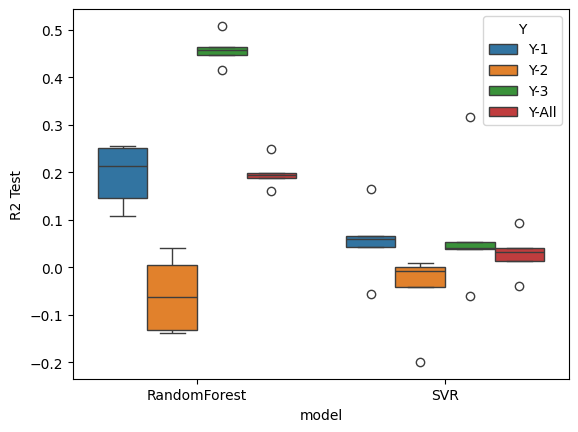

In [15]:
sns.boxplot(df, x="model", y="R2 Test", hue="Y")